# Deep Learning Using Keras

This is my first deep learning model as part of being a data science entuasist. 
It demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

In [84]:
#Install related model
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

## Prepare Input Data for Deep Learning
Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets

In [85]:


# import libraries
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
#load data
df_iris = pd.read_csv("iris.csv")

In [87]:
#explore the data
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
type('Species')

str

In [89]:
#Convert the 'Species' str type to numeric using a label encoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_iris['Species'] = label_encoder.fit_transform(
df_iris['Species'])

In [90]:
# We then convert the input into the Nump array
np_iris = df_iris.to_numpy()

In [91]:
#Then seperate feature and target variable
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]
print("\nFeatures before scaling :\n------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------")
print(Y_data[:5:])


Features before scaling :
------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------
[0. 0. 0. 0. 0.]


In [92]:
# creating a scalar model that is fit on the input data
scaler = StandardScaler().fit(X_data)

In [93]:
#Scale the numeric feature variables
X_data = scaler.transform(X_data)

In [94]:
#Convert target variable as a non-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [95]:
print("\nFeatures after scaling: \n----------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n--------")
print(Y_data[:5])


Features after scaling: 
----------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
--------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [96]:
#split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)
print("\nTrain test Dimensions:\n---------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train test Dimensions:
---------------
(135, 4) (135, 3) (15, 4) (15, 3)


## Creating a Model
Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [97]:
from tensorflow import keras

In [98]:
# Number of classes in the target variable
NB_CLASSES=3

In [99]:
#Create a sequential model in keras
model = tf.keras.models.Sequential()

In [100]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,                  #Number of nodes
                            input_shape=(4,),      #Number of input variables
                            name='Hidden-layer-1', #Logical name
                            activation='relu'))    #activation function

In [101]:
#Add a second hidden layer
model.add(keras.layers.Dense(128,
                            name='Hidden-layer-2',
                            activation='relu'))

In [102]:
#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                            name='Output-Layer',
                            activation='softmax'))

In [103]:
#Compile the model with loss & metrics 
model.compile(loss='categorical_crossentropy', #Since this is multi class classification model
             metrics=['accuracy'])       #metric to measure loss

In [104]:
#Print the model meta-data
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training and Evaluation
Training the model involves defining various training models and then perform forward and back propagation.

In [105]:
#Make it verbose so we can see the progress
VERBOSE=1

In [106]:
#SETUP HYPER PARAMETERS FOR TRAINING
#set batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2
print("\nTraining Progress:\n-------------")


Training Progress:
-------------


In [107]:
##Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X_train,
                Y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=VERBOSE,
                validation_split=VALIDATION_SPLIT)
print("\naccuracy during Training :\n------------")


Epoch 1/10
7/7 [==============================] - 1s 44ms/step - loss: 0.8028 - accuracy: 0.7593 - val_loss: 0.5798 - val_accuracy: 0.8519
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5298 - accuracy: 0.8241 - val_loss: 0.4695 - val_accuracy: 0.8519
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4357 - accuracy: 0.8333 - val_loss: 0.4079 - val_accuracy: 0.8519
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3803 - accuracy: 0.8426 - val_loss: 0.3923 - val_accuracy: 0.8519
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3357 - accuracy: 0.8704 - val_loss: 0.3958 - val_accuracy: 0.8519
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3022 - accuracy: 0.8796 - val_loss: 0.3641 - val_accuracy: 0.8519
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2756 - accuracy: 0.8796 - val_loss: 0.3628 - val_accuracy: 0.8519
Epoch 8/10
7/7 [=================

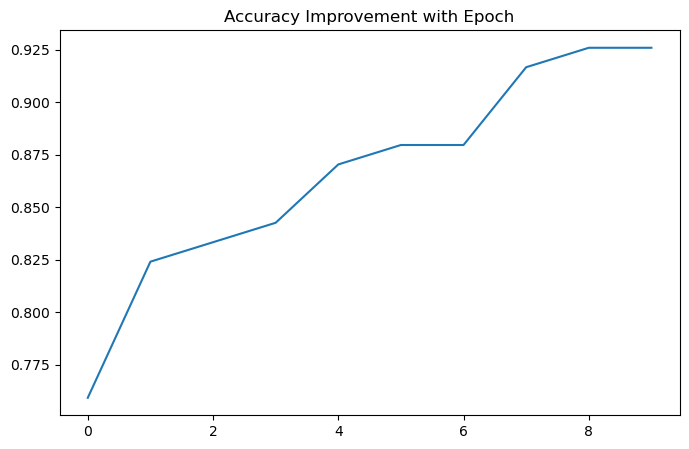

In [108]:
import matplotlib.pyplot as plt
#Plot accuracy of the model after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title('Accuracy Improvement with Epoch')
plt.show()


In [109]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :n\------------------")
model.evaluate(X_test, Y_test)


Evaluation against Test Dataset :n\------------------
1/1 [==============================] - 0s 28ms/step - loss: 0.2417 - accuracy: 1.0000


[0.24167579412460327, 1.0]

### Saving and Loading models
The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [111]:
#Saving a model
model.save("iris.save")

INFO:tensorflow:Assets written to: iris.save\assets


INFO:tensorflow:Assets written to: iris.save\assets


In [116]:
#Loading a model
loaded_model = keras.models.load_model('iris.save')

In [117]:
#print model summary
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Predictions with Deep Learning Models

In [119]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

In [121]:
#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

In [123]:
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

1/1 [==============================] - 0s 23ms/step
Raw Prediction Output (Probabilities) : [[0.01587509 0.62799895 0.35612598]]


In [124]:
#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

Prediction is  ['versicolor']
